In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

In [11]:
df = pd.read_csv('./Datasets/bitcoin_price.csv', index_col=['Date'],parse_dates=True,usecols=['Date','Close'])

In [12]:
df.head()

,Close
Date,
2017-11-07,7144.38
2017-11-06,7022.76
2017-11-05,7407.41
2017-11-04,7379.95
2017-11-03,7207.76


In [13]:
df = df.iloc[::-1]

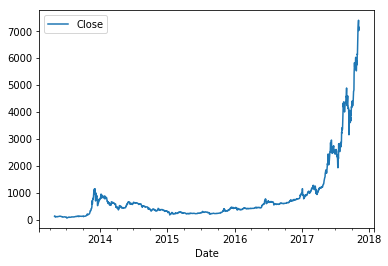

In [14]:
df.plot()

In [15]:
from fbprophet import Prophet

In [16]:
ml_df = df.reset_index().rename(columns={'Date':'ds', 'Close':'y'})
ml_df['y'] = np.log(ml_df['y'])
model = Prophet()
model.fit(ml_df);
future = model.make_future_dataframe(periods=365)
forecast = model.predict(future)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/rahulworld/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


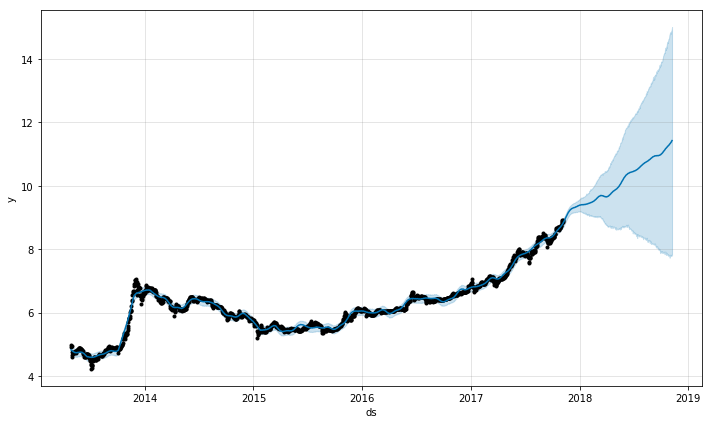

In [17]:
figure=model.plot(forecast)

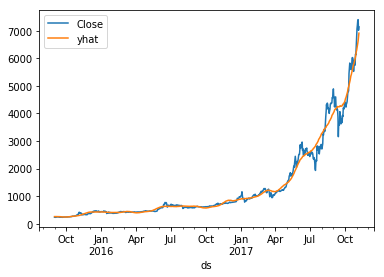

In [18]:
two_years = forecast.set_index('ds').join(df)
two_years = two_years[['Close', 'yhat', 'yhat_upper', 'yhat_lower' ]].dropna().tail(800)
two_years['yhat']=np.exp(two_years.yhat)
two_years['yhat_upper']=np.exp(two_years.yhat_upper)
two_years['yhat_lower']=np.exp(two_years.yhat_lower)
two_years[['Close', 'yhat']].plot()

In [19]:
two_years_AE = (two_years.yhat - two_years.Close)
two_years_AE.describe()

count     800.000000
mean       -9.006124
std       193.727396
min      -875.797989
25%       -38.867435
50%        -0.634904
75%        43.945691
max      1091.149429
dtype: float64

In [20]:
from sklearn.metrics import *

mean_squared_error(two_years.Close, two_years.yhat)

37564.501204929635

In [21]:
mean_absolute_error(two_years.Close, two_years.yhat)

104.86534895214837

In [22]:
r2_score(two_years.Close, two_years.yhat)

0.9819093868344356

Text(0.5,0,'Date')

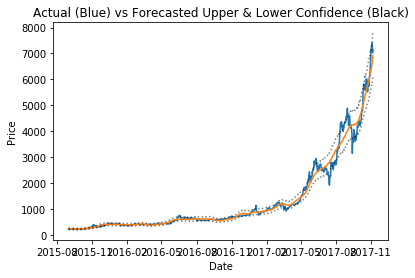

In [23]:
fig, ax1 = plt.subplots()
ax1.plot(two_years.Close)
ax1.plot(two_years.yhat)
ax1.plot(two_years.yhat_upper, color='black',  linestyle=':', alpha=0.5)
ax1.plot(two_years.yhat_lower, color='black',  linestyle=':', alpha=0.5)
 
ax1.set_title('Actual (Blue) vs Forecasted Upper & Lower Confidence (Black)')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')

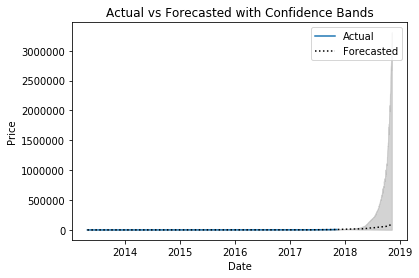

In [24]:
full_df = forecast.set_index('ds').join(df)
full_df['yhat']=np.exp(full_df['yhat'])
 
fig, ax1 = plt.subplots()
ax1.plot(full_df.Close)
ax1.plot(full_df.yhat, color='black', linestyle=':')
ax1.fill_between(full_df.index, np.exp(full_df['yhat_upper']), np.exp(full_df['yhat_lower']), alpha=0.5, color='darkgray')
ax1.set_title('Actual vs Forecasted with Confidence Bands')
ax1.set_ylabel('Price')
ax1.set_xlabel('Date')
 
L=ax1.legend() #get the legend
L.get_texts()[0].set_text('Actual') #change the legend text for 1st plot
L.get_texts()[1].set_text('Forecasted') #change the legend text for 2nd plot